# Data Preprocessing and Exploratory Data Analysis

## 1. Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ori_data = pd.read_csv("C:\StudySources\Master\ADS\data\CALERA WHOLESALE HISTORIC PRICE.csv")
ori_data

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Harry.Xie\AppData\Local\Temp\ipykernel_27428\3298506442.py:1: SyntaxWarning: invalid escape sequence '\S'
  ori_data = pd.read_csv("C:\StudySources\Master\ADS\data\CALERA WHOLESALE HISTORIC PRICE.csv")


,Date,ZONE,CHANNEL,SALES ZONE,PRICE WITH NO TAXES x KG,PRICE WITH TAXES x KG,KG,SOLES
0,2021/1/2,South,Mayorista,Arequipa,3.051674,3.60,"19,587.61","59,775.00"
1,2021/1/3,South,Mayorista,Arequipa,3.120002,3.68,"22,559.28","70,385.00"
2,2021/1/4,South,Mayorista,Arequipa,3.038903,3.59,"16,864.77","51,250.39"
3,2021/1/5,South,Mayorista,Arequipa,3.518057,4.15,"55,234.62","194,318.55"
4,2021/1/6,South,Mayorista,Arequipa,3.039112,3.59,"32,649.54","99,225.61"
...,...,...,...,...,...,...,...,...
12538,2025/1/18,North,Mayorista,Trujillo,7.203390,8.50,"1,534.00","11,050.00"
12539,2025/1/20,North,Mayorista,Trujillo,4.344276,5.13,"19,411.33","84,328.17"
12540,2025/1/21,North,Mayorista,Trujillo,4.618633,5.45,251.23,"1,160.33"
12541,2025/1/22,North,Mayorista,Trujillo,4.576270,5.40,209.54,958.93


### Location Mapping
The sales zone data is not corresponding to the official geo-values, `mapping` the locations to the correct name is essential.  
The mapping dictionary is as below.

In [3]:
# Create mapping dictionary
sales_zone_to_region = {
    "AREQUIPA": "Arequipa",
    "CHICLAYO": "Lambayeque",
    "CHINCHA": "Ica",
    "CUZCO": "Cusco",
    "HUANCAYO": "Junin",
    "HUANUCO": "Huanuco",
    "HUARAZ": "Ancash",
    "ICA": "Ica",
    "LIMA": "Lima",
    "LIMA NORTH": "Lima Norte",
    "PUCALLPA": "Ucayali",
    "TRUJILLO": "La Libertad"
}

In [4]:
ori_data["SALES ZONE"] = ori_data["SALES ZONE"].str.upper().map(sales_zone_to_region)
ori_data

,Date,ZONE,CHANNEL,SALES ZONE,PRICE WITH NO TAXES x KG,PRICE WITH TAXES x KG,KG,SOLES
0,2021/1/2,South,Mayorista,Arequipa,3.051674,3.60,"19,587.61","59,775.00"
1,2021/1/3,South,Mayorista,Arequipa,3.120002,3.68,"22,559.28","70,385.00"
2,2021/1/4,South,Mayorista,Arequipa,3.038903,3.59,"16,864.77","51,250.39"
3,2021/1/5,South,Mayorista,Arequipa,3.518057,4.15,"55,234.62","194,318.55"
4,2021/1/6,South,Mayorista,Arequipa,3.039112,3.59,"32,649.54","99,225.61"
...,...,...,...,...,...,...,...,...
12538,2025/1/18,North,Mayorista,La Libertad,7.203390,8.50,"1,534.00","11,050.00"
12539,2025/1/20,North,Mayorista,La Libertad,4.344276,5.13,"19,411.33","84,328.17"
12540,2025/1/21,North,Mayorista,La Libertad,4.618633,5.45,251.23,"1,160.33"
12541,2025/1/22,North,Mayorista,La Libertad,4.576270,5.40,209.54,958.93


### Missing Value

Check if there is any missing value in the dataset

In [5]:
ori_data.isnull().sum()

Date                        0
ZONE                        0
CHANNEL                     0
SALES ZONE                  0
PRICE WITH NO TAXES x KG    0
PRICE WITH TAXES x KG       0
KG                          0
SOLES                       0
dtype: int64

Result Shows there is not any missing value.  

### Describe the numerical indicators

In [6]:
ori_data.describe()

,PRICE WITH NO TAXES x KG,PRICE WITH TAXES x KG
count,12543.000000,12543.000000
mean,5.673914,6.695226
std,1.403063,1.655622
min,0.000000,0.000000
25%,4.576269,5.400000
50%,5.705272,6.730000
75%,6.824242,8.050000
max,14.856690,17.530000


### Time Frame

In [7]:
# Change the date format
ori_data["Date"] = pd.to_datetime(ori_data["Date"], format="%Y/%m/%d")
ori_data

,Date,ZONE,CHANNEL,SALES ZONE,PRICE WITH NO TAXES x KG,PRICE WITH TAXES x KG,KG,SOLES
0,2021-01-02,South,Mayorista,Arequipa,3.051674,3.60,"19,587.61","59,775.00"
1,2021-01-03,South,Mayorista,Arequipa,3.120002,3.68,"22,559.28","70,385.00"
2,2021-01-04,South,Mayorista,Arequipa,3.038903,3.59,"16,864.77","51,250.39"
3,2021-01-05,South,Mayorista,Arequipa,3.518057,4.15,"55,234.62","194,318.55"
4,2021-01-06,South,Mayorista,Arequipa,3.039112,3.59,"32,649.54","99,225.61"
...,...,...,...,...,...,...,...,...
12538,2025-01-18,North,Mayorista,La Libertad,7.203390,8.50,"1,534.00","11,050.00"
12539,2025-01-20,North,Mayorista,La Libertad,4.344276,5.13,"19,411.33","84,328.17"
12540,2025-01-21,North,Mayorista,La Libertad,4.618633,5.45,251.23,"1,160.33"
12541,2025-01-22,North,Mayorista,La Libertad,4.576270,5.40,209.54,958.93


### Data Integration

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Harry.Xie\AppData\Local\Temp\ipykernel_27428\3379280454.py:4: SyntaxWarning: invalid escape sequence '\S'
  shapefile_path = "C:\StudySources\Master\ADS\data\Geo\Peru.shp"


EPSG:4326


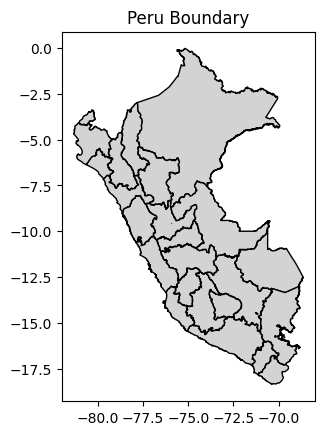

In [8]:
import geopandas as gpd

# read shapefile
shapefile_path = "C:\StudySources\Master\ADS\data\Geo\Peru.shp"
gdf = gpd.read_file(shapefile_path)

print(gdf.crs)  # show the coordinate reference system of the GeoDataFrame

# draw the boundary of Peru
gdf.plot(edgecolor="black", facecolor="lightgray")
plt.title("Peru Boundary")
plt.show()

In [9]:
ori_data['REGION'] = ori_data['SALES ZONE'].str.upper()

In [10]:
geo_data = ori_data.merge(gdf, left_on='REGION', right_on='NOMBDEP', how='left')
geo_data

,Date,ZONE,CHANNEL,SALES ZONE,PRICE WITH NO TAXES x KG,PRICE WITH TAXES x KG,KG,SOLES,REGION,OBJECTID_1,...,IND_122042,IND_122047,IND_516462,IND_516484,Shape_Le_1,Shape_Ar_1,Shape_Le_2,Shape_Ar_2,Shape_Area,geometry
0,2021-01-02,South,Mayorista,Arequipa,3.051674,3.60,"19,587.61","59,775.00",AREQUIPA,4.0,...,2.094167e+06,1.296536e+06,64872968.90,48033.0,0.0,0.0,17.391102,5.330046,0.0,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6..."
1,2021-01-03,South,Mayorista,Arequipa,3.120002,3.68,"22,559.28","70,385.00",AREQUIPA,4.0,...,2.094167e+06,1.296536e+06,64872968.90,48033.0,0.0,0.0,17.391102,5.330046,0.0,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6..."
2,2021-01-04,South,Mayorista,Arequipa,3.038903,3.59,"16,864.77","51,250.39",AREQUIPA,4.0,...,2.094167e+06,1.296536e+06,64872968.90,48033.0,0.0,0.0,17.391102,5.330046,0.0,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6..."
3,2021-01-05,South,Mayorista,Arequipa,3.518057,4.15,"55,234.62","194,318.55",AREQUIPA,4.0,...,2.094167e+06,1.296536e+06,64872968.90,48033.0,0.0,0.0,17.391102,5.330046,0.0,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6..."
4,2021-01-06,South,Mayorista,Arequipa,3.039112,3.59,"32,649.54","99,225.61",AREQUIPA,4.0,...,2.094167e+06,1.296536e+06,64872968.90,48033.0,0.0,0.0,17.391102,5.330046,0.0,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12538,2025-01-18,North,Mayorista,La Libertad,7.203390,8.50,"1,534.00","11,050.00",LA LIBERTAD,13.0,...,1.954102e+06,1.583726e+06,44308111.47,99249.0,0.0,0.0,13.076863,2.068684,0.0,"POLYGON ((-77.75753 -6.96579, -77.75638 -6.967..."
12539,2025-01-20,North,Mayorista,La Libertad,4.344276,5.13,"19,411.33","84,328.17",LA LIBERTAD,13.0,...,1.954102e+06,1.583726e+06,44308111.47,99249.0,0.0,0.0,13.076863,2.068684,0.0,"POLYGON ((-77.75753 -6.96579, -77.75638 -6.967..."
12540,2025-01-21,North,Mayorista,La Libertad,4.618633,5.45,251.23,"1,160.33",LA LIBERTAD,13.0,...,1.954102e+06,1.583726e+06,44308111.47,99249.0,0.0,0.0,13.076863,2.068684,0.0,"POLYGON ((-77.75753 -6.96579, -77.75638 -6.967..."
12541,2025-01-22,North,Mayorista,La Libertad,4.576270,5.40,209.54,958.93,LA LIBERTAD,13.0,...,1.954102e+06,1.583726e+06,44308111.47,99249.0,0.0,0.0,13.076863,2.068684,0.0,"POLYGON ((-77.75753 -6.96579, -77.75638 -6.967..."


## 2. EDA

### prices and sole

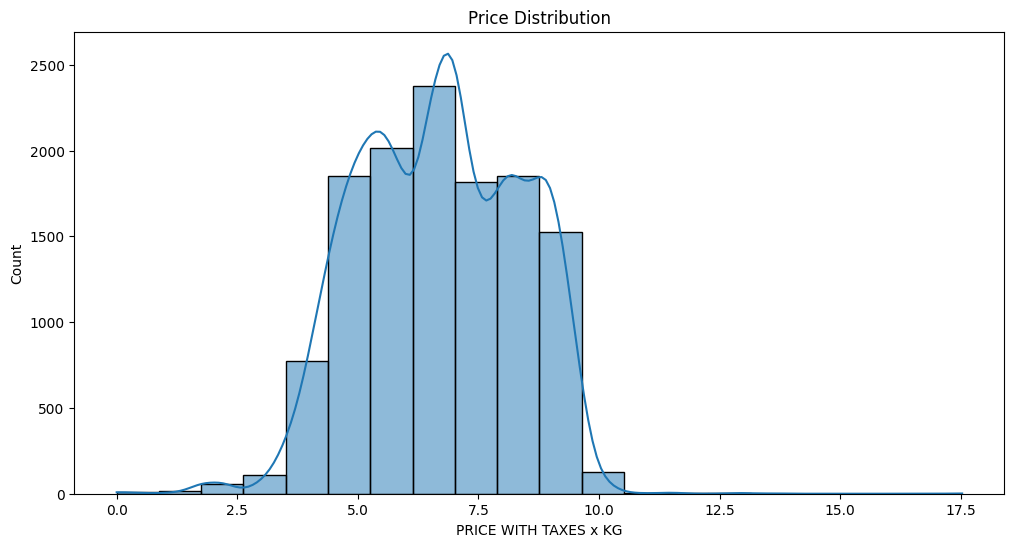

In [11]:
import seaborn as sns

# Plot the distribution of the price
plt.figure(figsize=(12, 6))
sns.histplot(ori_data["PRICE WITH TAXES x KG"], bins=20, kde=True)
plt.title("Price Distribution")
plt.show()

### Using Prophet

In [12]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

Importing plotly failed. Interactive plots will not work.


In [13]:
# Convert the 'SOLES' column to numeric by removing commas
ori_data["SOLES"] = ori_data["SOLES"].str.replace(",", "").astype(float)

m = Prophet()
ori_data = ori_data[ori_data["SOLES"] > 0]
m.fit(ori_data[["Date", "SOLES"]].rename(columns={"Date": "ds", "SOLES": "y"}))

19:38:53 - cmdstanpy - INFO - Chain [1] start processing
19:38:54 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
ori_data.describe()

,Date,PRICE WITH NO TAXES x KG,PRICE WITH TAXES x KG,SOLES
count,12540,12540.000000,12540.000000,12540.000000
mean,2023-01-29 17:23:01.435406848,5.675272,6.696828,81241.619177
min,2021-01-02 00:00:00,0.000000,0.000000,0.020000
25%,2022-01-28 00:00:00,4.576269,5.400000,20159.082500
50%,2023-02-07 00:00:00,5.706059,6.730000,56543.460000
75%,2024-02-01 00:00:00,6.824288,8.050000,121559.997500
max,2025-01-31 00:00:00,14.856690,17.530000,804286.100000
std,NaN,1.400483,1.652578,80469.957887


In [15]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1753,2026-01-27
1754,2026-01-28
1755,2026-01-29
1756,2026-01-30
1757,2026-01-31


In [16]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1753,2026-01-27,6559.949660,-92421.411610,105740.845289
1754,2026-01-28,-3649.192275,-103462.344645,101408.245433
1755,2026-01-29,6206.929925,-91352.231375,104683.892675
1756,2026-01-30,-594.682348,-99567.948501,94077.051417
1757,2026-01-31,3382.560855,-92642.993199,101828.219192


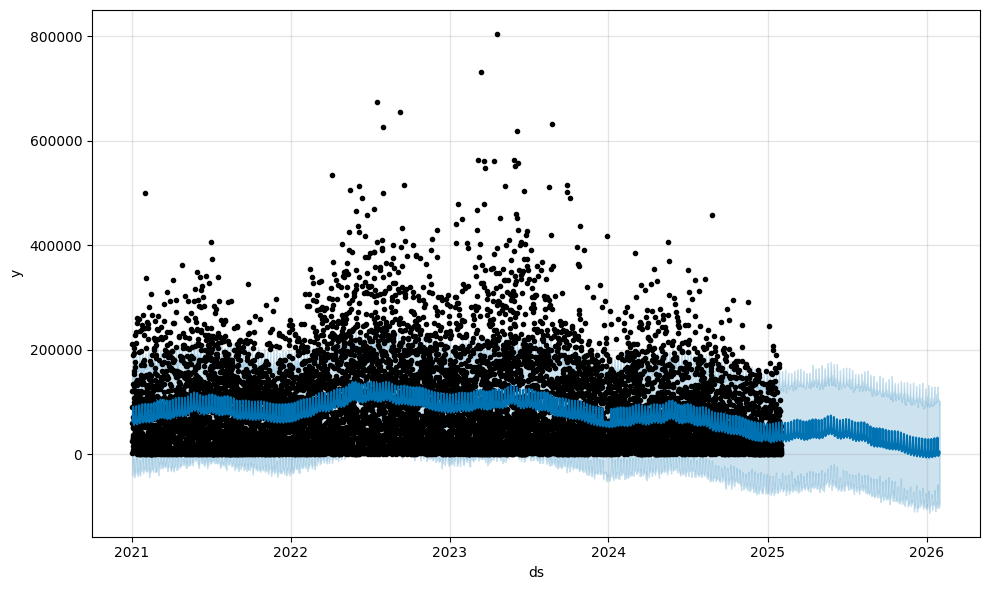

In [17]:
fig1 = m.plot(forecast)

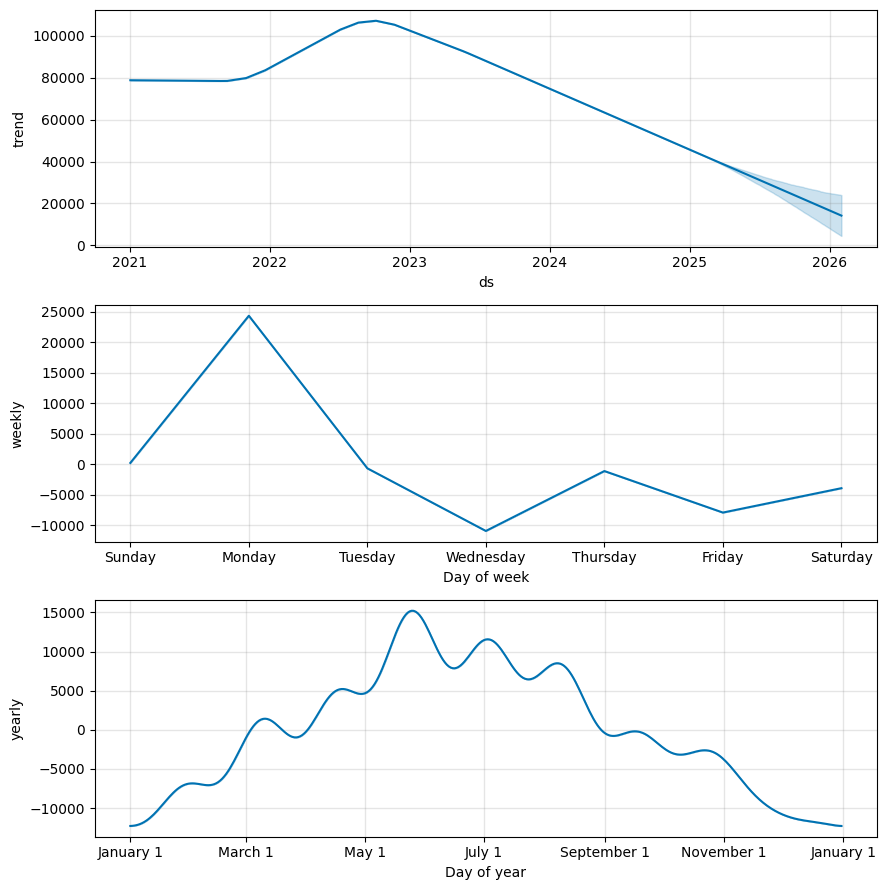

In [18]:
fig2 = m.plot_components(forecast)

#### Forecasting Growth

19:29:48 - cmdstanpy - INFO - Chain [1] start processing
19:29:50 - cmdstanpy - INFO - Chain [1] done processing


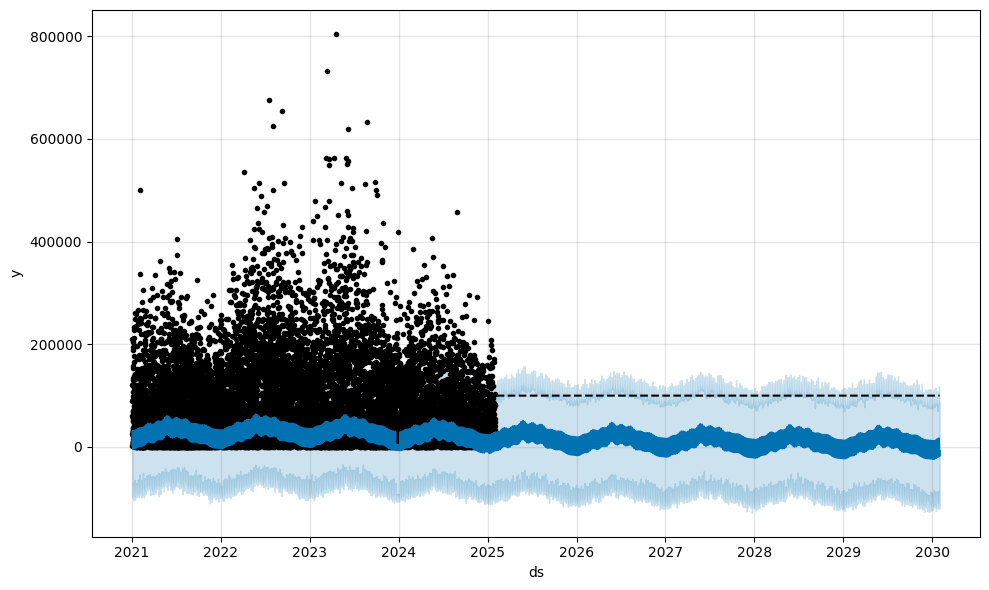

In [35]:
# Forecasting Growth
ori_data['cap'] = 400000
m = Prophet(growth='logistic')
m.fit(ori_data[["Date", "SOLES", "cap"]].rename(columns={"Date": "ds", "SOLES": "y"}))

future = m.make_future_dataframe(periods=1826)
future['cap'] = 100000
fcst = m.predict(future)
fig = m.plot(fcst)


#### Using log

In [ ]:
# Filter out rows where 'SOLES' is less than or equal to zero
filtered_data = ori_data[ori_data["SOLES"] > 0]

# Prepare the dataframe for Prophet
df1 = filtered_data[["Date", "SOLES"]].rename(columns={"Date": "ds", "SOLES": "y"})
df1['y'] = np.log(df1['y'])
print(df1.head())

# Fit the Prophet model
m1= Prophet()
m1.fit(df1)


          ds          y
0 2021-01-02  10.998343
1 2021-01-03  11.161735
2 2021-01-04  10.844479
3 2021-01-05  12.177254
4 2021-01-06  11.505151


19:35:26 - cmdstanpy - INFO - Chain [1] start processing
19:35:27 - cmdstanpy - INFO - Chain [1] done processing


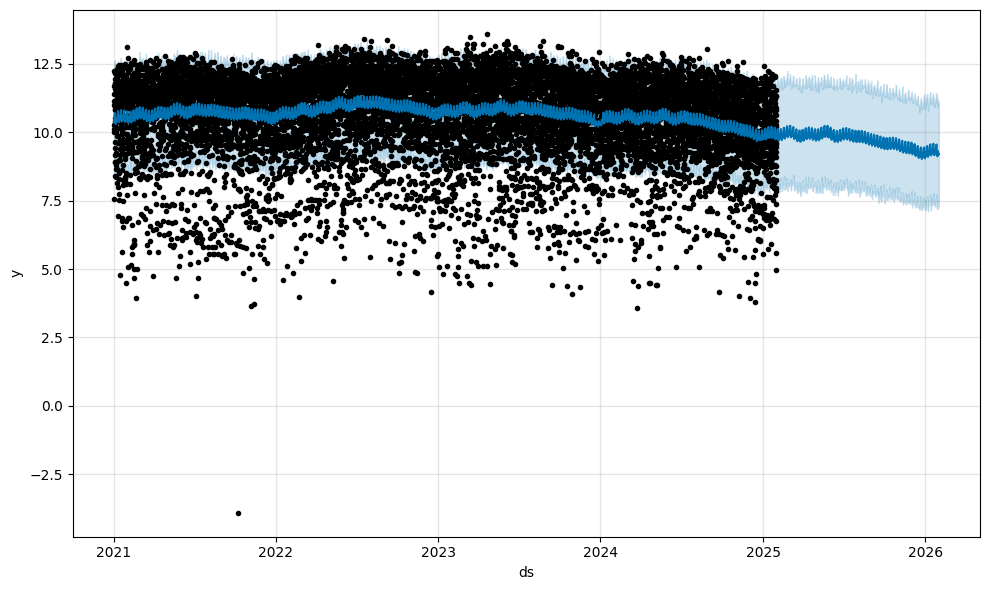

In [ ]:
future = m1.make_future_dataframe(periods=365)
future.tail()

forecast = m1.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig3 = m1.plot(forecast)

#### Change Point

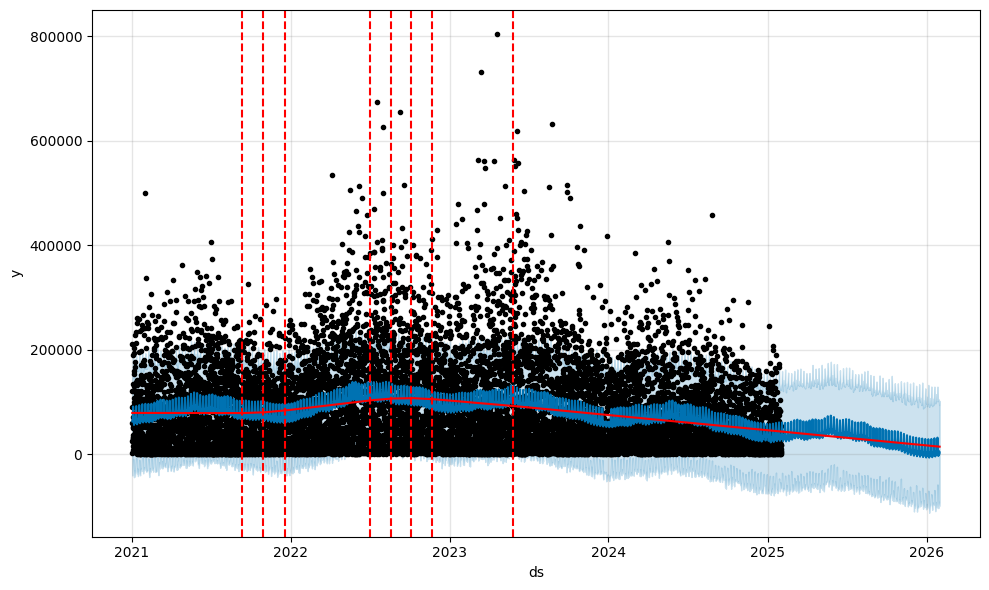

In [19]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

19:42:28 - cmdstanpy - INFO - Chain [1] start processing
19:42:30 - cmdstanpy - INFO - Chain [1] done processing


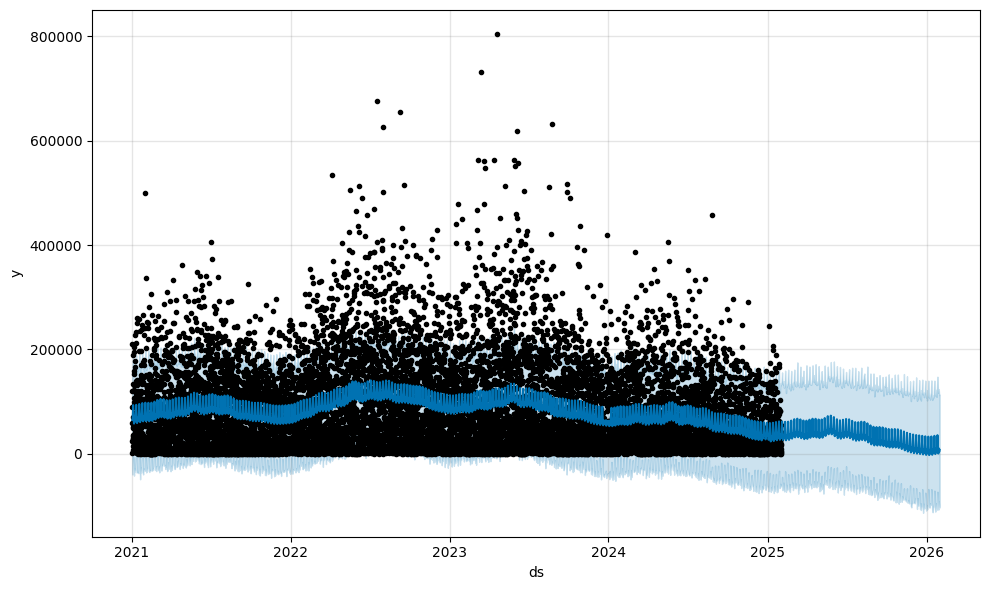

In [22]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(ori_data[["Date", "SOLES"]].rename(columns={"Date": "ds", "SOLES": "y"})).predict(future)
fig = m.plot(forecast)

## 3. Modelling with Prophet

In [23]:
holidays = pd.read_csv("C:\StudySources\Master\ADS\data\Combined_Holidays.csv")
holidays

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Harry.Xie\AppData\Local\Temp\ipykernel_27428\3257454921.py:1: SyntaxWarning: invalid escape sequence '\S'
  holidays = pd.read_csv("C:\StudySources\Master\ADS\data\Combined_Holidays.csv")


,ds,holiday,lower_window,upper_window
0,2021-01-01,school_holiday,0,1
1,2021-01-02,school_holiday,0,1
2,2021-01-03,school_holiday,0,1
3,2021-01-04,school_holiday,0,1
4,2021-01-05,school_holiday,0,1
...,...,...,...,...
487,2025-08-30,saint_rose_of_lima,0,1
488,2025-10-08,naval_battle_of_angamos,0,1
489,2025-11-01,all_saints'_day,0,1
490,2025-12-08,immaculate_conception_day,0,1


In [24]:
df = ori_data[["Date", "SOLES"]].rename(columns={"Date": "ds", "SOLES": "y"})

m = Prophet(holidays=holidays)
forecast = m.fit(df).predict(future)

20:01:54 - cmdstanpy - INFO - Chain [1] start processing
20:01:55 - cmdstanpy - INFO - Chain [1] done processing


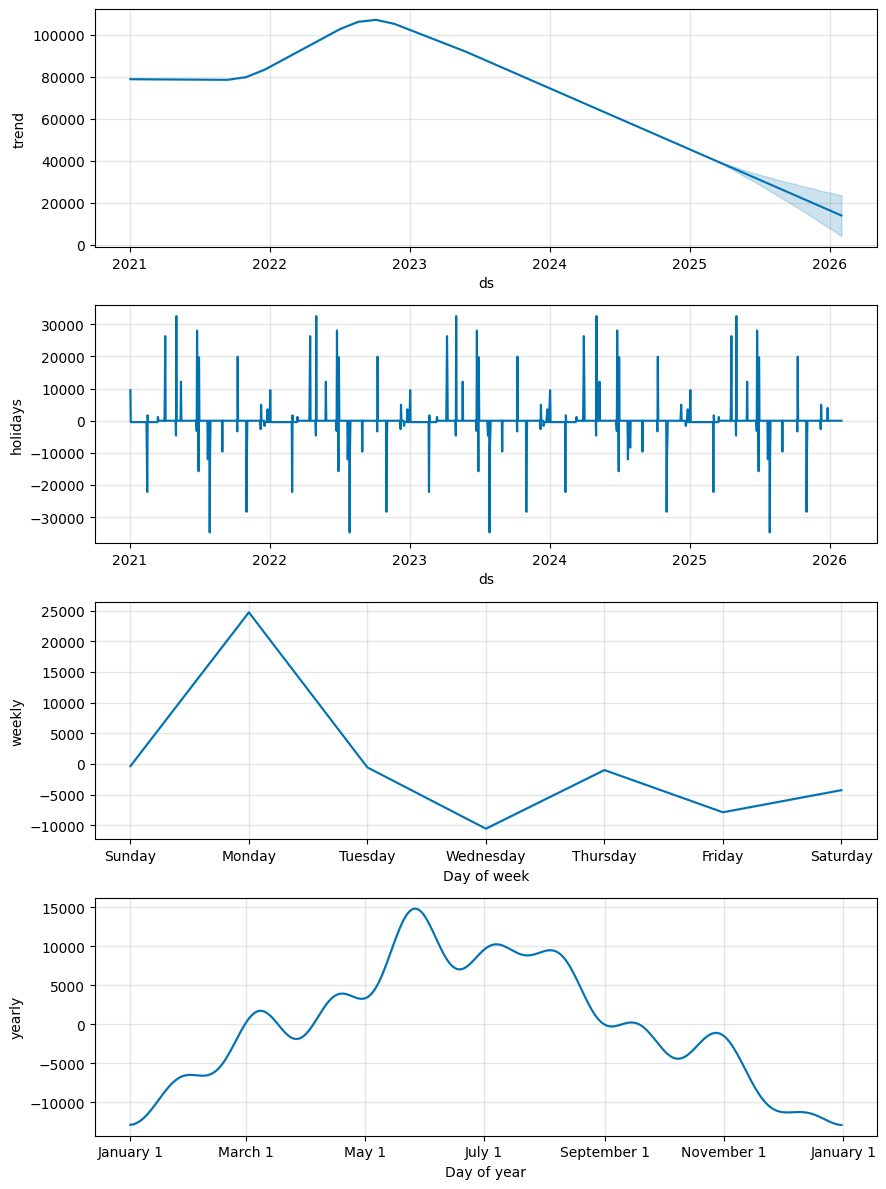

In [25]:
fig = m.plot_components(forecast)

In [26]:
# Merge the holidays data with ori_data
ori_data_with_holidays = ori_data.merge(holidays, left_on="Date", right_on="ds", how="left")

# Add a column to indicate whether it's a holiday or not
ori_data_with_holidays["is_holiday"] = ori_data_with_holidays["holiday"].notnull()

# Group by holiday status and calculate the average SOLES
holiday_effect = ori_data_with_holidays.groupby("is_holiday")["SOLES"].mean()

print(holiday_effect)

is_holiday
False    84156.474909
True     73474.621272
Name: SOLES, dtype: float64


##### Taking 2024  as an example

In [27]:
# df2024
df2024 = ori_data[ori_data["Date"].dt.year == 2024]
df2024 = df2024[["Date", "SOLES"]].rename(columns={"Date": "ds", "SOLES": "y"})

In [28]:
m = Prophet()
m.fit(df2024)

20:09:33 - cmdstanpy - INFO - Chain [1] start processing
20:09:33 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
688,2025-12-27
689,2025-12-28
690,2025-12-29
691,2025-12-30
692,2025-12-31


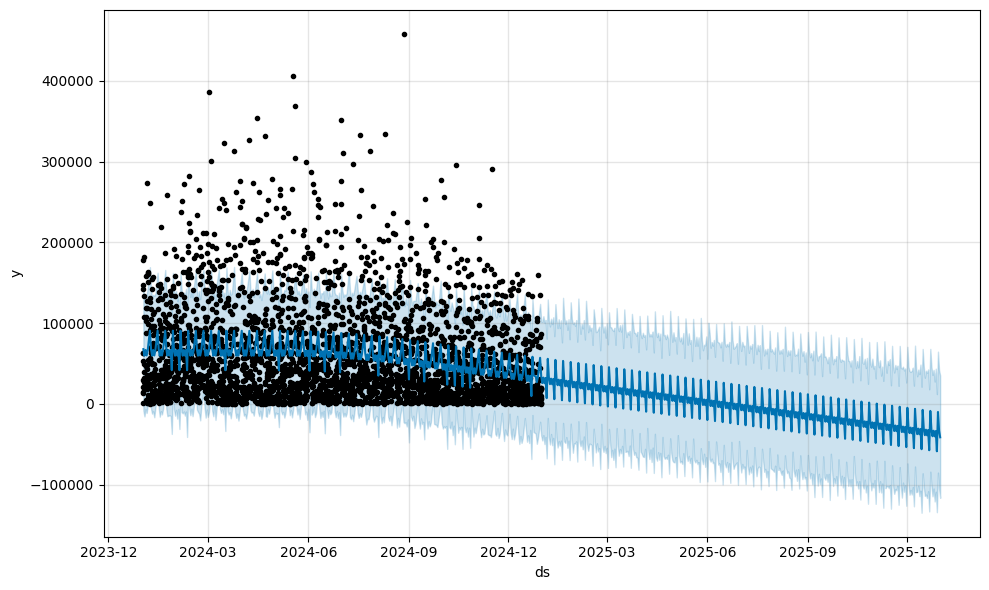

In [30]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = m.plot(forecast)

